(how-to:data:share:archive:profile)=

# How to inspect an archive

```{note}
This tutorial can be downloaded and run as a Jupyter Notebook: {nb-download}`archive_profile.ipynb` {octicon}`download`, together with the archive {download}`include/process.aiida`.
```

The AiiDA archive is a file format for long term storage of data from a particular profile.

See {ref}`how-to:share:archives` for information on how to create and migrate an archive.
Once you have an archive at the latest version, you can inspect its contents in the same way you would with a standard AiiDA profile.

We first create a profile instance from the archive path:

In [1]:
from aiida import manage, orm, profile_context
from aiida.storage.sqlite_zip.backend import SqliteZipBackend

archive_profile = SqliteZipBackend.create_profile('include/process.aiida')
print(archive_profile)

Profile<uuid='f0c8cbddf0cd456f889cab9414e8794c' name='process.aiida'>


The {py:func}`~aiida.manage.configuration.profile_context` function works similarly to the {py:func}`~aiida.manage.configuration.load_profile` function,
but is used within a context manager, that insures that the storage is properly closed when the context is exited.
With this, we can load our archive as a profile:

In [2]:
with profile_context(archive_profile):
    print(manage.get_manager().get_profile())

Profile<uuid='f0c8cbddf0cd456f889cab9414e8794c' name='process.aiida'>


To directly access the storage backend, and view information about it, we can use:

In [3]:
import json
with profile_context(archive_profile):
    storage = manage.get_manager().get_profile_storage()
    print(storage)
    print(json.dumps(storage.get_info(), indent=2))

SqliteZip storage (read-only) [open] @ include/process.aiida
{
  "metadata": {
    "export_version": "main_0001",
    "aiida_version": "2.0.0a1",
    "key_format": "sha256",
    "compression": 6,
    "ctime": "2022-03-10T11:56:56.759722",
    "creation_parameters": {
      "entities_starting_set": {
        "node": [
          "cff1e914-5a34-4930-9429-9dcc6d38feb1"
        ]
      },
      "include_authinfos": false,
      "include_comments": true,
      "include_logs": true,
      "graph_traversal_rules": {
        "input_calc_forward": false,
        "input_calc_backward": true,
        "create_forward": true,
        "create_backward": true,
        "return_forward": true,
        "return_backward": false,
        "input_work_forward": false,
        "input_work_backward": true,
        "call_calc_forward": true,
        "call_calc_backward": true,
        "call_work_forward": true,
        "call_work_backward": true
      }
    }
  }
}


This is directly equivalent to the command-line call:

In [4]:
!verdi archive info include/process.aiida

-

metadata:
  export_version: main_0001
  aiida_version: 2.0.0a1
  key_format: sha256
  compression: 6
  ctime: '2022-03-10T11:56:56.759722'
  creation_parameters:
    entities_starting_set:
      node:
      - cff1e914-5a34-4930-9429-9dcc6d38feb1
    include_authinfos: false
    include_comments: true
    include_logs: true
    graph_traversal_rules:
      input_calc_forward: false
      input_calc_backward: true
      create_forward: true
      create_backward: true
      return_forward: true
      return_backward: false
      input_work_forward: false
      input_work_backward: true
      call_calc_forward: true
      call_calc_backward: true
      call_work_forward: true
      call_work_backward: true



Note, that once the context manager is exited, the storage is closed, and will except on further calls.

In [5]:
print(storage)

SqliteZip storage (read-only) [closed] @ include/process.aiida


As per a standard profile, we can now use the {py:class}`~aiida.orm.QueryBuilder`, to [find and query for data](how-to:query):

In [6]:
with profile_context(archive_profile):
    process = orm.QueryBuilder().append(orm.ProcessNode).first(flat=True)
    print(process)

uuid: cff1e914-5a34-4930-9429-9dcc6d38feb1 (pk: 61)


and also use {py:class}`~aiida.tools.visualization.graph.Graph`, to [visualize data provenance](how-to:data:visualise-provenance):

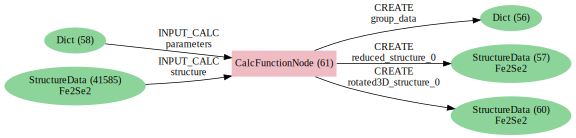

In [7]:
from aiida.tools.visualization import Graph

with profile_context(archive_profile):
    process = orm.QueryBuilder().append(orm.ProcessNode).first(flat=True)
    graph = Graph(graph_attr={"size": "8!,8!", "rankdir": "LR"})
    graph.add_incoming(process, annotate_links="both")
    graph.add_outgoing(process, annotate_links="both")

graph.graphviz